In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from math import ceil
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt


In [2]:
df_cluster = pd.read_parquet(path="./../data/clean_data/category_seasonal_data.parquet")
df_sample_20 = df_cluster.sample(n=20000, random_state=42)

In [3]:
def df_cluster_scores(df_cluster : pd.DataFrame, initial_range : int, final_range : int, random:int=42, 
    score_types:list=["silhouette"], width_per_ax : int=5, height_per_ax : int=5): 
    
    km = KMeans(random_state=random)
    visualizer = KElbowVisualizer(km, k=(initial_range, final_range))
    visualizer.fit(df_cluster)
    visualizer.show()

    fitted_kmeans = {}
    labels_kmeans = {}
    df_scores = []
    for n_clusters in np.arange(initial_range, final_range):
        tmp_scores = {}
        tmp_scores["n_clusters"] = n_clusters
        
        kmeans = KMeans(n_clusters=n_clusters, random_state=random)
        labels_clusters = kmeans.fit_predict(df_cluster)
        
        fitted_kmeans[n_clusters] = kmeans
        labels_kmeans[n_clusters] = labels_clusters
        
        if "silhouette" in score_types:
            silhouette = silhouette_score(df_cluster, labels_clusters)
            tmp_scores["silhouette"] = silhouette
        
        if "calinski_harabasz" in score_types:
            ch = calinski_harabasz_score(df_cluster, labels_clusters)
            tmp_scores["calinski_harabasz"] = ch
        
        if "davies_bouldin" in score_types:
            db = davies_bouldin_score(df_cluster, labels_clusters)
            tmp_scores["davies_bouldin"] = db
                    
        df_scores.append(tmp_scores)

    df_scores = pd.DataFrame(df_scores)
    df_scores.set_index("n_clusters", inplace=True)
    df_scores.plot(subplots=True, layout=(1,len(score_types)), figsize=(len(score_types) * width_per_ax, height_per_ax), xticks=np.arange(initial_range, final_range+1))

    return

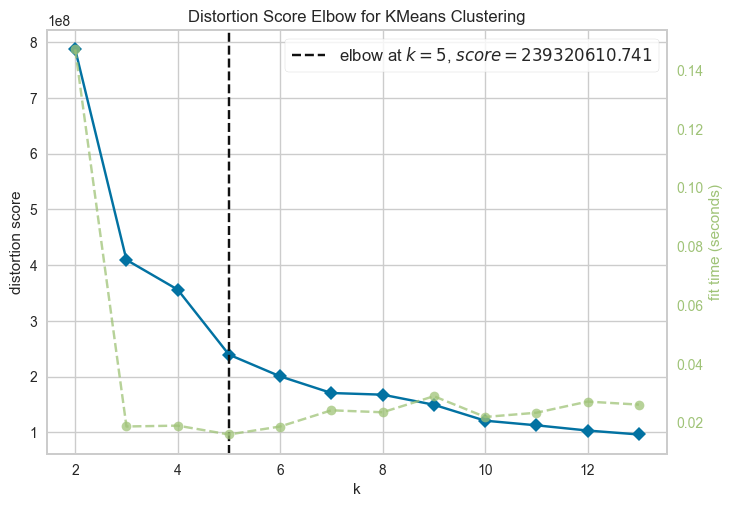

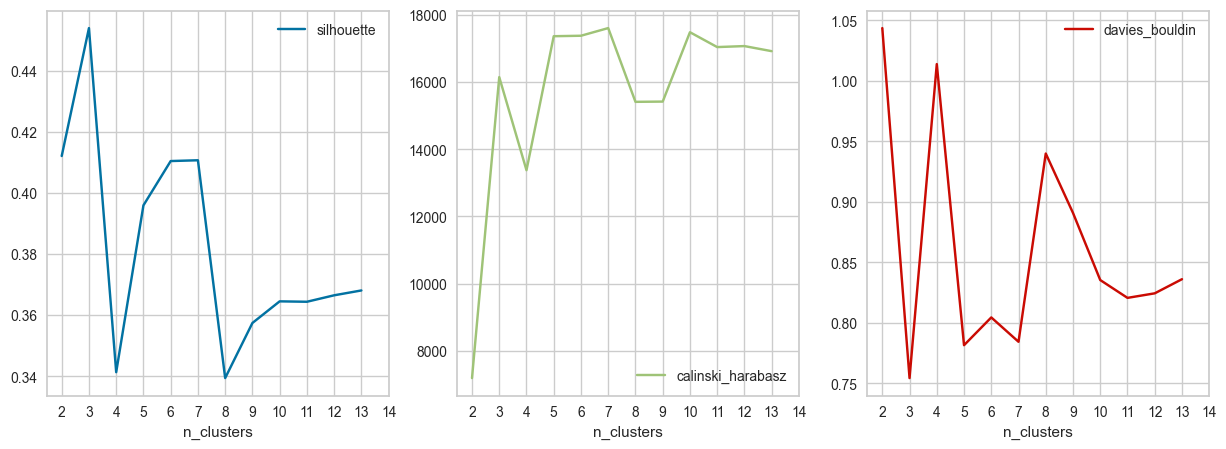

In [4]:
a = 1
df_cluster_scores(df_sample_20, 2, 14, score_types=["silhouette", "calinski_harabasz", "davies_bouldin"])
b = 2

In [16]:
def multi_silhoutte(df_cluster : pd.DataFrame, initial_range : int, final_range : int, 
        per_col : int=2, random : int=42, width_per_ax : int=6, height_per_ax : int=5):
    
    final_range += 1
    lines = ceil((final_range-initial_range)/per_col)
    
    fig, axes = plt.subplots(lines, per_col, figsize=(per_col*width_per_ax,lines*height_per_ax))
    for pos, nCluster in enumerate(range(initial_range, final_range)):
        km = KMeans(n_clusters=nCluster, random_state=random)
        
        if lines == 1:
            ax=axes[pos]
        else: 
            q, mod = divmod(pos, per_col)
            ax = axes[q][mod]
        
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
        visualizer.fit(df_cluster)
        ax.set_title(f"clusters = {nCluster}\nscore = {visualizer.silhouette_score_}") 

    return

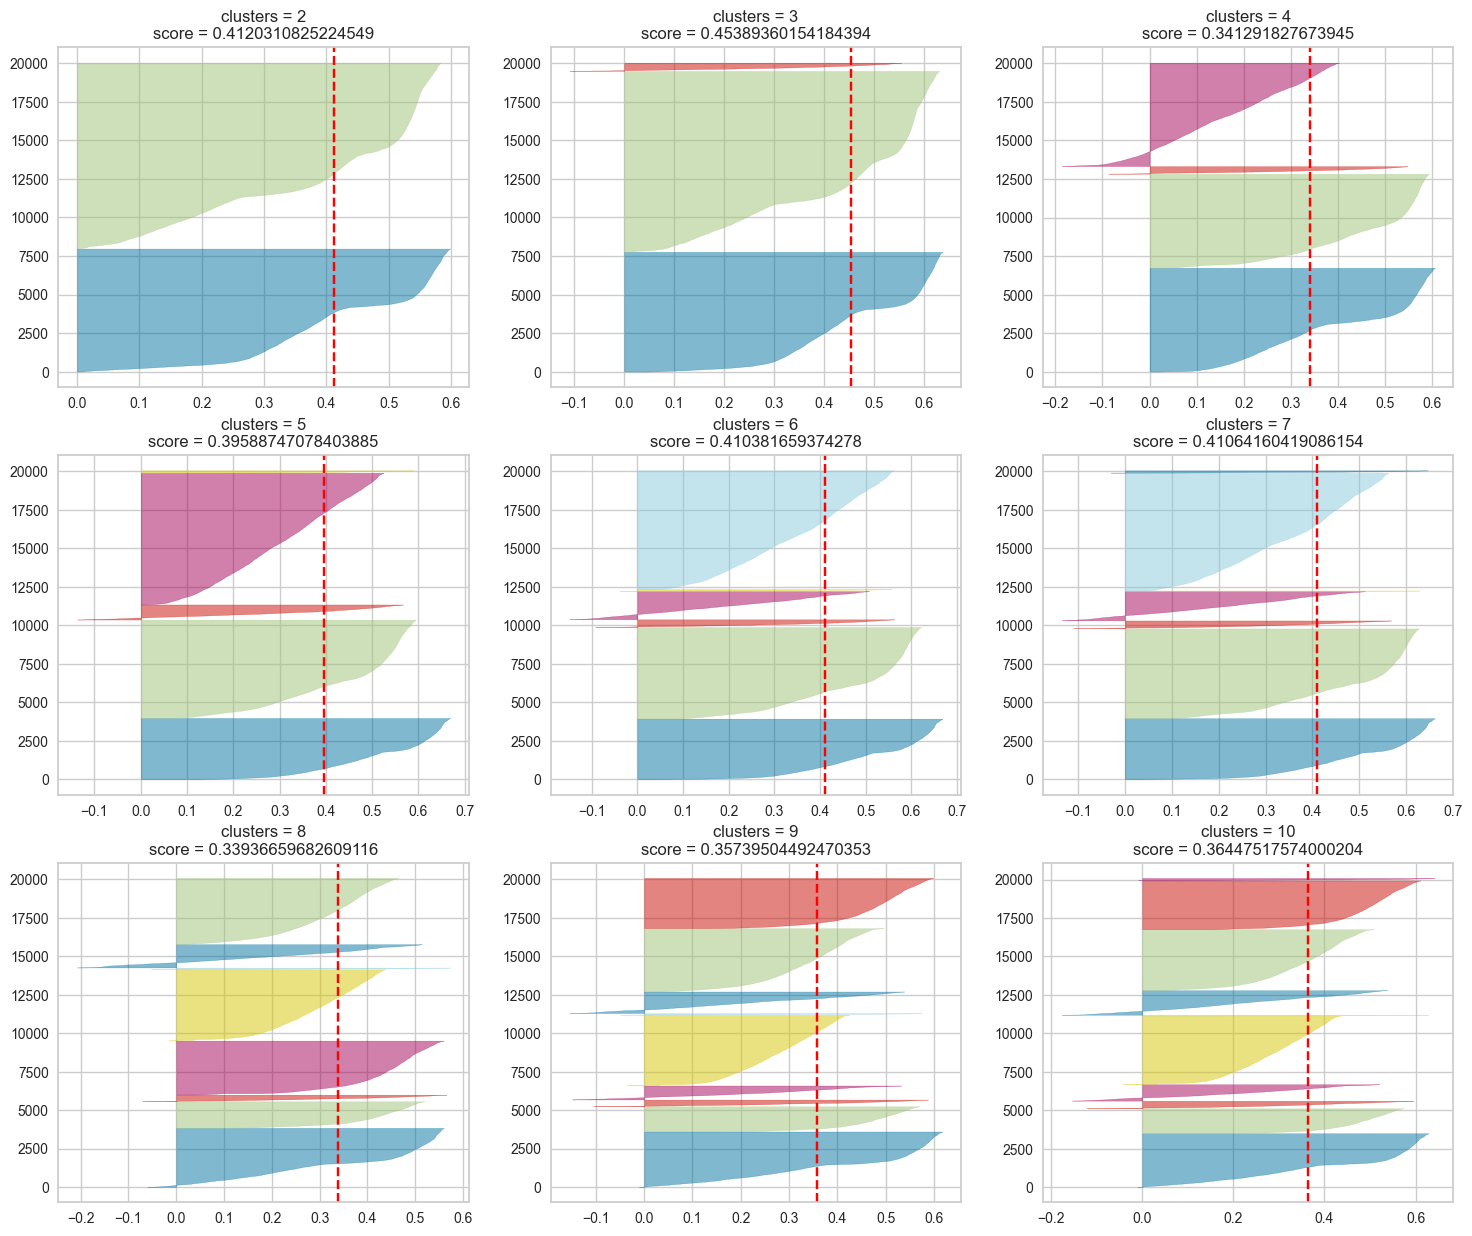

In [17]:
a = 1
multi_silhoutte(df_sample_20, 2,10, per_col=3)
b = 2 

In [13]:
def visualize_silhoutte(df_cluster : pd.DataFrame, n_cluster : int, random : int=42, width_per_ax : int=6, height_per_ax : int=5):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(width_per_ax, height_per_ax)
    km = KMeans(n_clusters=n_cluster, random_state=random)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax1)
    visualizer.fit(df_cluster)
    ax1.set_title(f"clusters normalizado = {n_cluster}\nscore = {visualizer.silhouette_score_}") 

    return 

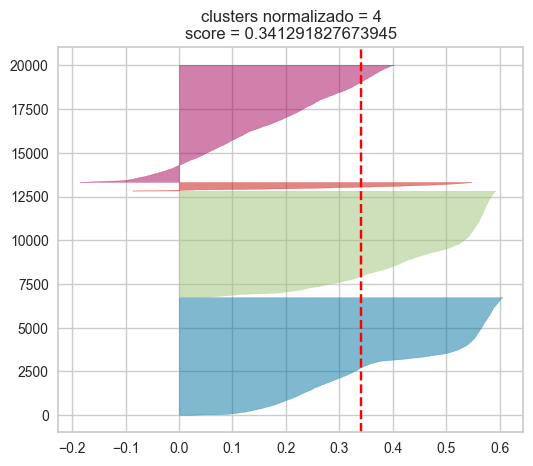

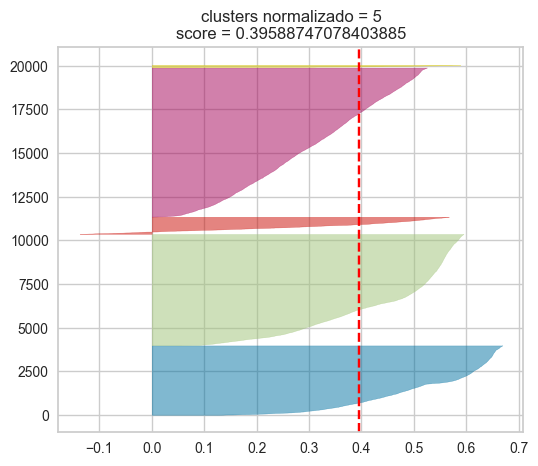

In [15]:
a = 1
visualize_silhoutte(df_sample_20, 4)
visualize_silhoutte(df_sample_20, 5)
b = 2